### Problem Statement

You are a data scientist / AI engineer at a healthcare consulting firm. You have been provided with a dataset named **`"patient_health_data.csv"`**, which includes records of various health indicators for a group of patients. The dataset comprises the following columns:

- `age:` The age of the patient.
- `bmi:` Body Mass Index of the patient.
- `blood_pressure:` The blood pressure of the patient.
- `cholesterol:` Cholesterol levels of the patient.
- `glucose:` Glucose levels of the patient.
- `insulin:` Insulin levels of the patient.
- `heart_rate:` Heart rate of the patient.
- `activity_level:` Activity level of the patient.
- `diet_quality:` Quality of diet of the patient.
- `smoking_status:` Whether the patient smokes (Yes or No).
- `alcohol_intake:` The amount of alcohol intake by the patient.
- `health_risk_score:` A composite score representing the overall health risk of a patient.

Your task is to use this dataset to build a linear regression model to predict the health risk score based on the given predictor variables. Additionally, you will use L1 (Lasso) and L2 (Ridge) regularization techniques to improve the model's performance. 

**Import Necessary Libraries**

In [11]:
# Import necessary libraries
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

### Task 1: Data Preparation and Exploration

1. Import the data from the **`"patient_health_data.csv"`** file and store it in a variable df.
2. Display the number of rows and columns in the dataset.
3. Display the first few rows of the dataset to get an overview.
4. Check for any missing values in the dataset and handle them appropriately.
5. Encode the categorical variable `'smoking_status'` by converting 'Yes' to 1 and 'No' to 0.

In [12]:
# Step 1: Import the data from the "patient_health_data.csv" file and store it in a variable 'df'
df = pd.read_csv("patient_health_data.csv")

# Step 2: Display the number of rows and columns in the dataset
print("Number of rows and columns:", df.shape)

# Step 3: Display the first few rows of the dataset to get an overview
print("First few rows of the dataset:")
df.head()

Number of rows and columns: (250, 12)
First few rows of the dataset:


,age,bmi,blood_pressure,cholesterol,glucose,insulin,heart_rate,activity_level,diet_quality,smoking_status,alcohol_intake,health_risk_score
0,58,24.865215,122.347094,165.730375,149.289441,22.306844,75.866391,1.180237,7.675409,No,0.824123,150.547752
1,71,19.103168,136.852028,260.610781,158.584646,13.869817,69.481114,7.634622,8.933057,No,0.852910,160.320350
2,48,22.316562,137.592457,177.342582,178.760166,22.849816,69.386962,7.917398,3.501119,Yes,4.740542,187.487398
3,34,22.196893,153.164775,234.594764,136.351714,15.140336,95.348387,3.192910,2.745585,No,2.226231,148.773138
4,62,29.837173,92.768973,276.106498,158.753516,17.228576,77.680975,7.044026,8.918348,No,3.944011,170.609655


In [13]:
# Step 4: Check for any missing values in the dataset and handle them appropriately
df.isna().sum()

age                  0
bmi                  0
blood_pressure       0
cholesterol          0
glucose              0
insulin              0
heart_rate           0
activity_level       0
diet_quality         0
smoking_status       0
alcohol_intake       0
health_risk_score    0
dtype: int64

In [14]:
# Step 5: Encode the categorical variable 'smoking_status' by converting 'Yes' to 1 and 'No' to 0.
df['smoking_status']=df['smoking_status'].replace(["Yes","No"],[1,0]);
df['smoking_status']

0      0
1      0
2      1
3      0
4      0
      ..
245    0
246    0
247    0
248    0
249    1
Name: smoking_status, Length: 250, dtype: int64

### Task 2: Train Linear Regression Models

1. Select the features and the target variable for modeling.
2. Split the data into training and test sets with a test size of 25%.
3. Initialize and train a Linear Regression model, and evaluate its performance using R-squared.
4. Initialize and train a Lasso Regression model with various alpha values provided in a list: [0.01, 0.1, 1.0, 10.0], and evaluate its performance using R-squared.
5. Initialize and train a Ridge Regression model with various alpha values provided in a list: [0.01, 0.1, 1.0, 10.0], and evaluate its performance using R-squared.

In [15]:
# Step 1: Select the features and target variable for modeling

X=df.drop(['health_risk_score'],axis=1)
y=df['health_risk_score']

# Step 2: Split the data into training and test sets with a test size of 25%
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

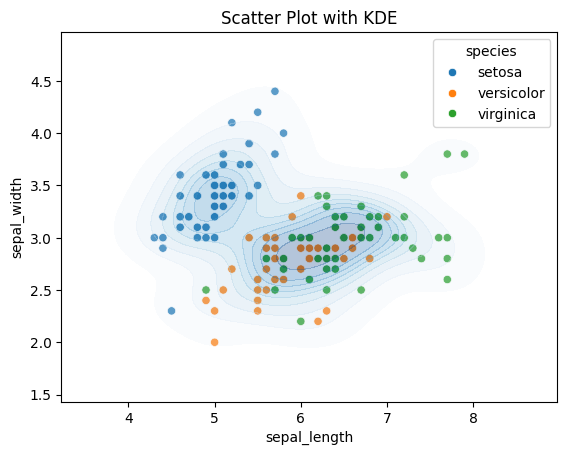

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Example DataFrame
df = sns.load_dataset('iris')

# Create scatter plot
sns.scatterplot(data=df, x='sepal_length', y='sepal_width', hue='species')

# Add KDE
sns.kdeplot(data=df, x='sepal_length', y='sepal_width', fill=True, alpha=0.3, cmap='Blues')

# Show plot
plt.title('Scatter Plot with KDE')
plt.show()

In [17]:
# Step 3: Initialize and train a Linear Regression model, and evaluate its performance using R-squared

model=LinearRegression()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.870143043735226

In [45]:
# Step 4: Initialize and train a Lasso Regression model with various alpha values provided in a list, and evaluate its performance using R-squared
m1=Lasso(alpha=0.001)
m1.fit(x_train,y_train)
m1.score(x_test,y_test)

0.8701349398944176

In [46]:
# Step 5: Initialize and train a Ridge Regression model with various alpha values provided in a list, and evaluate its performance using R-squared
m2=Ridge(alpha=0.000001)
m2.fit(x_train,y_train)
m2.score(x_test,y_test)

0.8701430437250572